(oltre-rasch-notebook)=
# Oltre il Modello di Rasch 

Nell'ambito dei modelli IRT, il modello di Rasch impone i vincoli più restrittivi. Tali vincoli possono essere rilassati progressivamente definendo quelli che vengono chiamati modelli 1PL, 2PL e 3Pl.

In [1]:
source("../_common.R")

suppressPackageStartupMessages({
    library("eRm")
    library("mirt")
    library("grid")
    library("TAM")
    # devtools::install_github("masurp/ggmirt")
    library("ggmirt")
    library("psychotools")
    library("latex2exp")
    })

In questo capitolo, utilizzeremo nuovamente i dati che abbiamo esaminato in precedenza. 

In [2]:
data(data.fims.Aus.Jpn.scored, package = "TAM")
fims <- data.fims.Aus.Jpn.scored

Esaminiamo le risposte dei primi 400 partecipanti. Per facilitare la manipolazione dei dati, cambiamo il nome delle colonne.

In [3]:
responses <- fims[1:400, 2:15]
colnames(responses) <- gsub("M1PTI", "I", colnames(responses))
glimpse(responses)

Rows: 400
Columns: 14
$ I1  <dbl> 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, …
$ I2  <dbl> 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, …
$ I3  <dbl> 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, …
$ I6  <dbl> 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, …
$ I7  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ I11 <dbl> 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, …
$ I12 <dbl> 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ I14 <dbl> 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, …
$ I17 <dbl> 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, …
$ I18 <dbl> 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, …
$ I19 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ I21 <dbl> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, …
$ I22 <dbl> 0, 0, 

In [4]:
gender <- as.factor(fims$SEX[1:400])
levels(gender) <- c("male", "female")

## Modello ad Un Parametro

Il modello ad un parametro è formulato nel modo seguente:

$$ 
\begin{equation}
P(X_i = 1 \mid \theta_v, \alpha, \delta_i) = \frac{\exp(\alpha(\theta_v - \delta_i))}{1 + \exp(\alpha(\theta_v - \delta_i))} = \frac{1}{1 + \exp(-\alpha(\theta_v - \delta_i))},
\end{equation}
$$ (eq-1pl-model)

dove $\alpha$ rappresenta la pendenza delle ICC. L'assenza di un pedice significa che $\alpha$ non varia tra gli item. 

Nel contesto del modello IRT (Teoria della Risposta all'Item) a un parametro, il parametro $\alpha$ è collegato alla pendenza della Funzione di Risposta all'Item (IRF). Esso riflette quanto bene un item è in grado di discriminare tra individui situati in punti diversi lungo il continuum. Di conseguenza, $\alpha$ è noto come il parametro di discriminazione dell'item.

Per facilitare la comprensione, supponiamo di avere tre item con diversi valori di $\alpha$, tutti posizionati a $0.0$ (cioè, $\delta_1 = \delta_2 = \delta_3 = 0$). I nostri tre parametri di discriminazione sono $0$, $1$ e $2$. Inoltre, abbiamo un rispondente A situato a $-1$ ($\theta_A = -1$) e un altro rispondente B situato a $1$ (cioè, $\theta_B = 1$). Per l'item con $\alpha = 0.0$, la nostra IRF e la linea di regressione logit sono orizzontali. Di conseguenza, la probabilità prevista di una risposta di tipo 1 per entrambi i rispondenti è $0.5$:

$$
P(X_i = 1 \mid \theta, \delta_i) = 0.5.
$$

In questo caso, l'item non fornisce alcuna informazione utile per differenziare tra i due rispondenti. Questa mancanza di potere discriminatorio è una funzione diretta di $\alpha = 0.0$.

Al contrario, con il secondo item ($\alpha = 1$) abbiamo previsioni diverse per i nostri rispondenti:

$$
P(X_i = 1 \mid \theta, \delta_i) = \frac{1}{1 + e^{-(\theta - \delta_i)}}.
$$

Per il rispondente A la probabilità $p_2 = 0.2689$ e per il rispondente B $p_2 = 0.7311$. Pertanto, il parametro $\alpha$ di questo item ci permette di distinguere tra i due rispondenti.

Sviluppando ulteriormente questa idea, troviamo che il terzo item ($\alpha = 2.0$) avrebbe l'ICC (e la linea di regressione logit) più ripida dei tre item. Questa ripidità si riflette in una maggiore differenza nelle probabilità previste per i nostri rispondenti rispetto ai due item precedenti:

$$
P(X_i = 1 \mid \theta, \delta_i) = \frac{1}{1 + e^{-2(\theta - \delta_i)}}.
$$

Ovvero, per questo item il rispondente A ha una probabilità $p_3 = 0.1192$ e per il rispondente B $p_3 = 0.8808$. In breve, l'entità della differenza in queste probabilità previste è una funzione diretta del parametro $\alpha$ dell'item. Pertanto, gli item con $\alpha$ maggiori (cioè con linee di regressione logit e IRF più ripide) discriminano meglio tra i rispondenti situati in punti diversi del continuum rispetto agli item con $\alpha$ minori.

In sintesi, maggiore è il valore di $\alpha$, più ripida sarà la curva ICC e maggiore sarà la discriminazione tra individui con diversi livelli di abilità $\theta$.

### Modello di Rasch e Modello 1PL

Per riassumere, sia il modello 1PL che il modello di Rasch richiedono che gli item abbiano un parametro $\alpha$ costante, ma permettono che gli item differiscano nelle loro posizioni. Nel modello di Rasch, questo parametro costante è fissato a $1.0$, mentre nel modello 1PL, $\alpha$ non deve necessariamente essere uguale a $1.0$. Matematicamente, i modelli 1PL e Rasch sono equivalenti e i valori di un modello possono essere trasformati nell'altro attraverso una riscalatura appropriata. 

Tuttavia, per alcuni, il modello di Rasch rappresenta una prospettiva filosofica diversa da quella incarnata nel modello 1PL. Il modello 1PL si concentra sull'adattare i dati nel miglior modo possibile, data la struttura del modello. Al contrario, il modello di Rasch viene utilizzato per costruire la variabile di interesse (cfr. Andrich, 1988; Wilson, 2005; Wright, 1984; Wright & Masters, 1982; Wright & Stone, 1979). In breve, questa prospettiva sostiene che il modello di Rasch sia lo standard secondo il quale si può creare uno strumento per misurare una variabile. Questa visione è analoga a ciò che avviene nelle scienze fisiche. Ad esempio, consideriamo la misurazione del tempo. La misurazione del tempo implica un processo ripetitivo che segna incrementi uguali (cioè, unità) della variabile latente del tempo. Per misurare il tempo, dobbiamo definire la nostra unità (ad esempio, un periodo standard di oscillazione). Con il modello di Rasch, l'unità è definita come il logit, ossia la distanza sul nostro continuum che porta a un aumento del rapporto di successo di un fattore uguale alla costante trascendentale $e$. Pertanto, analogamente alla misurazione del tempo, le nostre misurazioni con un modello a un parametro si basano sull'uso (ripetitivo) di un'unità che rimane costante nella nostra metrica. 

Per semplicità, nel seguito utilizzeremo il termine generale modello 1PL per riferirci sia alla situazione in cui $\alpha = 1.0$ (cioè, il modello di Rasch) sia alla situazione in cui $\alpha$ è uguale a qualche altra costante. Tuttavia, quando usiamo il termine modello di Rasch, ci riferiamo alla situazione in cui $\alpha = 1.0$ e a una filosofia di misurazione che afferma che il modello di Rasch sia la base per costruire la variabile di interesse.

In [5]:
mirt_rm <- mirt(responses, 1, "Rasch")

Iteration: 16, Log-Lik: -2816.487, Max-Change: 0.00008


### Discriminazione

La formula generale per una curva caratteristica dell'item (ICC) in un modello 1PL è:

$$ 
P(\theta) = \frac{1}{1 + \exp(-a \cdot (\theta - b))},
$$

dove:
- $ P(\theta) $ è la probabilità di una risposta corretta.
- $ \theta $ è l'abilità del rispondente.
- $ a $ è il parametro di discriminazione dell'item, fisso per tutti gli item.
- $ b $ è il parametro di difficoltà dell'item.

Nel modello di Rasch, il parametro di discriminazione $a$ viene fissato a 1 per tutti gli item, per cui otteniamo

$$ 
P(\theta) = \frac{1}{1 + \exp(-(\theta - b))}.
$$

Il concetto di "discriminazione" nel contesto dei modelli di risposta all'item (IRT) si riferisce alla capacità di un item di distinguere tra individui con abilità leggermente superiore e quelli con abilità leggermente inferiore rispetto alla difficoltà dell'item stesso. Questa capacità discriminante è caratterizzata dalla pendenza della curva caratteristica dell'item (ICC) "nel mezzo", ovvero per livelli di abilità vicini alla difficoltà dell'item, con discriminazioni più elevate che corrispondono a pendenze più ripide.

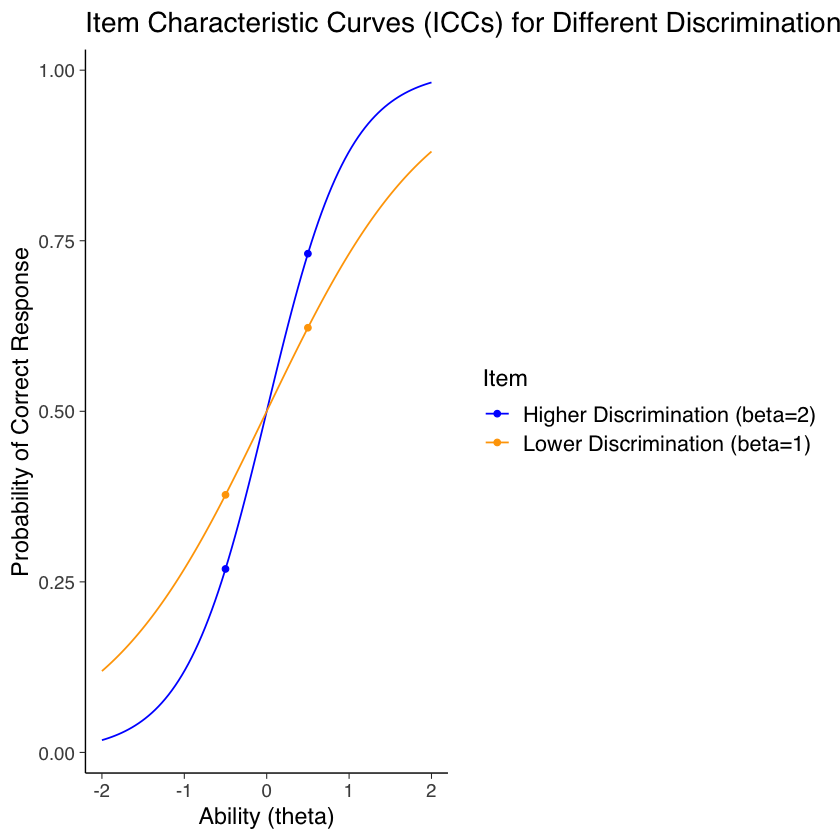

In [6]:
# Definizione della funzione sigmoide per rappresentare le ICC
sigmoid <- function(x, beta) {
    1 / (1 + exp(-beta * (x - 0)))
}

# Creazione di una sequenza di livelli di abilità
abilities <- seq(-2, 2, length.out = 100)

# Calcolo delle probabilità per due item con diversi valori di discriminazione
# Per l'item di sinistra (discriminazione inferiore, beta=1)
probabilities_left <- sigmoid(abilities, beta = 1)

# Per l'item di destra (discriminazione superiore, beta=2)
probabilities_right <- sigmoid(abilities, beta = 2)

# Creazione del dataframe per ggplot
data <- data.frame(
    Ability = rep(abilities, 2),
    Probability = c(probabilities_left, probabilities_right),
    Item = rep(c("Lower Discrimination (beta=1)", "Higher Discrimination (beta=2)"), each = 100)
)

# Creazione del grafico
ggplot(data, aes(x = Ability, y = Probability, color = Item)) +
    geom_line() +
    scale_color_manual(values = c("blue", "orange")) +
    geom_point(
        data = data.frame(
            Ability = c(-0.5, 0.5, -0.5, 0.5),
            Probability = c(sigmoid(-0.5, 1), sigmoid(0.5, 1), sigmoid(-0.5, 2), sigmoid(0.5, 2)),
            Item = c("Lower Discrimination (beta=1)", "Lower Discrimination (beta=1)", "Higher Discrimination (beta=2)", "Higher Discrimination (beta=2)")
        ),
        aes(x = Ability, y = Probability, color = Item)
    ) +
    ggtitle("Item Characteristic Curves (ICCs) for Different Discriminations") +
    xlab("Ability (theta)") +
    ylab("Probability of Correct Response") 

Consideriamo due diverse Curve Caratteristiche dell'Item (ICC) per item con difficoltà zero. 
In questa funzione, `sigmoid <- function(x, beta) { 1 / (1 + exp(-beta * (x - 0))) }``, il parametro `beta` rappresenta la discriminazione dell'item, mentre la difficoltà dell'item è implicitamente fissata a zero (b = 0). Questa funzione, quindi, non modella direttamente variazioni nella difficoltà dell'item, ma solo nella discriminazione.

Le ICC sono calcolate per due item con diversi livelli di discriminazione, rappresentati come "Lower Discrimination (beta=1)" e "Higher Discrimination (beta=2)" nel grafico. Le probabilità che persone con abilità di −0.5 e +0.5 risolvano correttamente l'item sono rispettivamente approssimativamente 0.38 e 0.62 per l'item con discriminazione inferiore (beta=1, rappresentato con la curva blu) 

In [7]:
sigmoid <- function(x, beta) {
    1 / (1 + exp(-beta * (x - 0)))
}
sigmoid(-0.5, 1)
sigmoid(0.5, 1)

[1] 0.3775407

[1] 0.6224593

e 0.27 e 0.73 per l'item con discriminazione superiore (beta=2, rappresentato con la curva arancione)

In [8]:
sigmoid(-0.5, 2)
sigmoid(0.5, 2)

[1] 0.2689414

[1] 0.7310586

Ciò indica che due persone con una differenza di 1 nella loro abilità mostrano una differenza di 0.24 nella loro probabilità di risolvere correttamente l'item con discriminazione inferiore (curva blu) e una differenza di 0.46 per l'item con discriminazione superiore (curva arancione).

La pendenza al centro dell'ICC, dove la curva è quasi lineare, può essere approssimata da questa differenza sull'asse y divisa per la differenza sull'asse x, risultando in circa 0.24 per l'item con discriminazione inferiore e 0.46 per quello con discriminazione superiore. In termini più semplici, la pendenza è una misura di quanto rapidamente la probabilità di una risposta corretta aumenta (o diminuisce) in relazione a un cambiamento nell'abilità dell'individuo. Una pendenza più ripida, come quella dell'item con discriminazione superiore (curva arancione), indica una maggiore discriminazione, cioè l'item è più efficace nel distinguere tra persone con livelli di abilità leggermente differenti.

Nel Modello di Rasch, si assume che tutti gli item abbiano la stessa discriminazione, con una pendenza di 1. Questo è evidente dalla formula del modello, dove l'unico parametro per ciascun item $i$ è la sua difficoltà $\beta_i$, senza parametri aggiuntivi per modellare la discriminazione. Tuttavia, questo approccio è spesso considerato troppo rigido dal punto di vista della modellazione, poiché molti test reali contengono item con discriminazioni disuguali. In contrasto, il modello logistico a due parametri (2PL) di Birnbaum incorpora un parametro di pendenza, permettendo a ciascun item di avere una discriminazione diversa. 

In sintesi, la discriminazione in un test psicometrico è un concetto chiave che descrive quanto efficacemente un item può differenziare tra rispondenti con abilità simili ma non identiche. Maggiore è la discriminazione, più efficacemente l'item può identificare le differenze sottili nelle abilità dei rispondenti.

## Modello IRT a due parametri

Il modello 2PL, noto come "Modello IRT a due parametri", prevede che le curve caratteristiche degli item non siano tra loro parallele. Questo modello utilizza due parametri per descrivere le curve caratteristiche di ciascun item: il parametro di difficoltà $\delta_i$ e il parametro di discriminazione $\alpha_i$. Il parametro $\alpha_i$ consente alle curve caratteristiche di avere pendenze diverse e riflette la capacità discriminante dell'item rispetto alla variabile latente. Le curve caratteristiche nel modello 2PL hanno la seguente forma:

$$
\begin{equation} 
  Pr(X_{vi} = 1 \mid \theta_v, \delta_i, \alpha_i) = \frac{\exp(\alpha_i(\theta_v-\delta_i))}{1+ \exp(\alpha_i(\theta_v-\delta_i))}.
\end{equation}
$$ (eq-2pl)

Adattiamo il modello 2PL ai dati.

In [9]:
mirt_2pl <- mirt(responses, 1, "2PL")

Iteration: 14, Log-Lik: -2759.601, Max-Change: 0.00009


Esaminiamo le curve caratteristiche degli item.

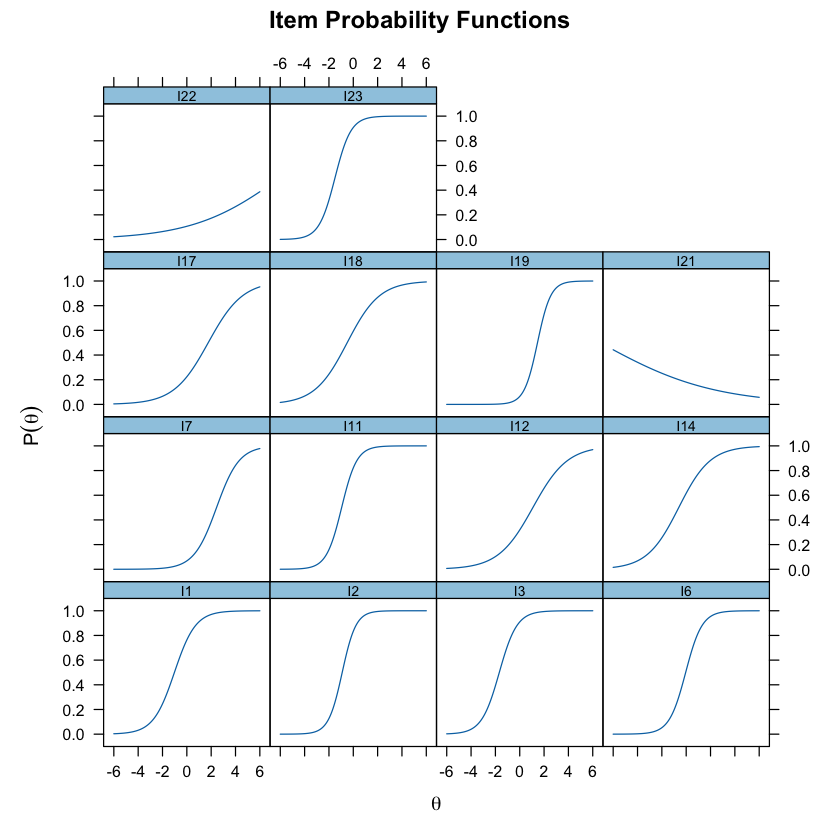

In [10]:
plot(mirt_2pl, type = "trace")

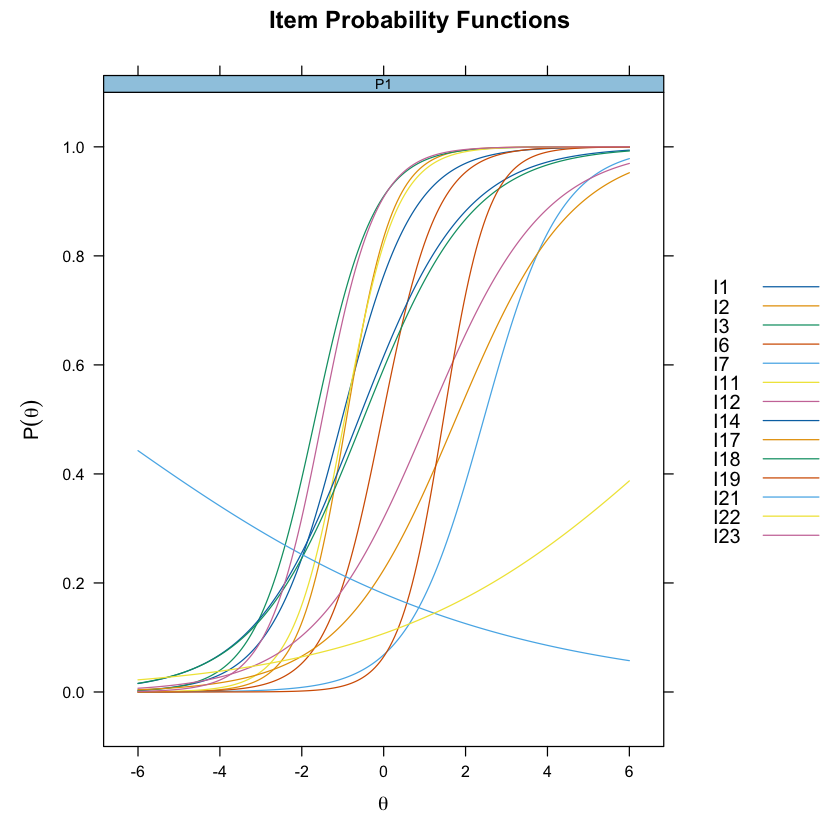

In [11]:
plot(mirt_2pl, type = "trace", facet_items = FALSE)

Possiamo visualizzare le stime dei parametri degli item per il 2PL utilizzando la funzione `coef()`.

In [12]:
coef(mirt_2pl, IRTpars = TRUE, simplify = TRUE)

,a,b,g,u
I1,1.1474247,-1.02151843,0,1
I2,1.7687105,-0.91065318,0,1
I3,1.3724569,-1.67979991,0,1
I6,1.4786119,-0.04254241,0,1
I7,1.0714345,2.44143950,0,1
I11,1.5944811,-0.95699944,0,1
I12,0.7033227,1.07888714,0,1
I14,0.7707027,-0.61243178,0,1
I17,0.7066769,1.75774430,0,1
I18,0.7498268,-0.50187180,0,1


Effettuiamo un confronto tra il modello di Rash e il modello 2PL.

In [13]:
anova(mirt_rm, mirt_2pl)

,AIC,SABIC,HQ,BIC,logLik,X2,df,p
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mirt_rm,5662.973,5675.249,5686.683,5722.845,-2816.487,NA,NA,NA
mirt_2pl,5575.203,5598.118,5619.462,5686.964,-2759.601,113.7703,13,0


Questo indica che il 2PL fornisce un adattamento significativamente migliore rispetto al modello di Rasch, suggerendo che gli item non hanno tutti la stessa pendenza.

## Modello IRT a tre parametri

Per considerare l'eventuale tendenza dei rispondenti a indovinare, i modelli IRT introducono un ulteriore parametro, denotato con $\gamma_i$. Il modello a tre parametri (3PL) assume la seguente forma:

$$
\begin{equation} 
Pr(X_{vi} = 1 \mid \theta_v, \delta_i, \alpha_i, \gamma_i) = \gamma_i + (1-\gamma_i) \frac{\exp(\alpha_i(\theta_v-\delta_i))}{1 + \exp(\alpha_i(\theta_v-\delta_i))}.
\end{equation}
$$ (eq-3pl)

Il parametro $\gamma_i$ ha l'effetto di introdurre un asintoto orizzontale maggiore di zero per valori di $\theta_v$ tendenti a $-\infty$. In altre parole, per item con $\gamma_i = 0.25$, la probabilità di risposta corretta dovuta al caso è almeno pari a 0.25, anche per i livelli di abilità latente più bassi.

In [14]:
mirt_3pl <- mirt(responses, 1, "3PL")

Iteration: 41, Log-Lik: -2740.210, Max-Change: 0.00009


Esaminiamo le curve caratteristiche degli item.

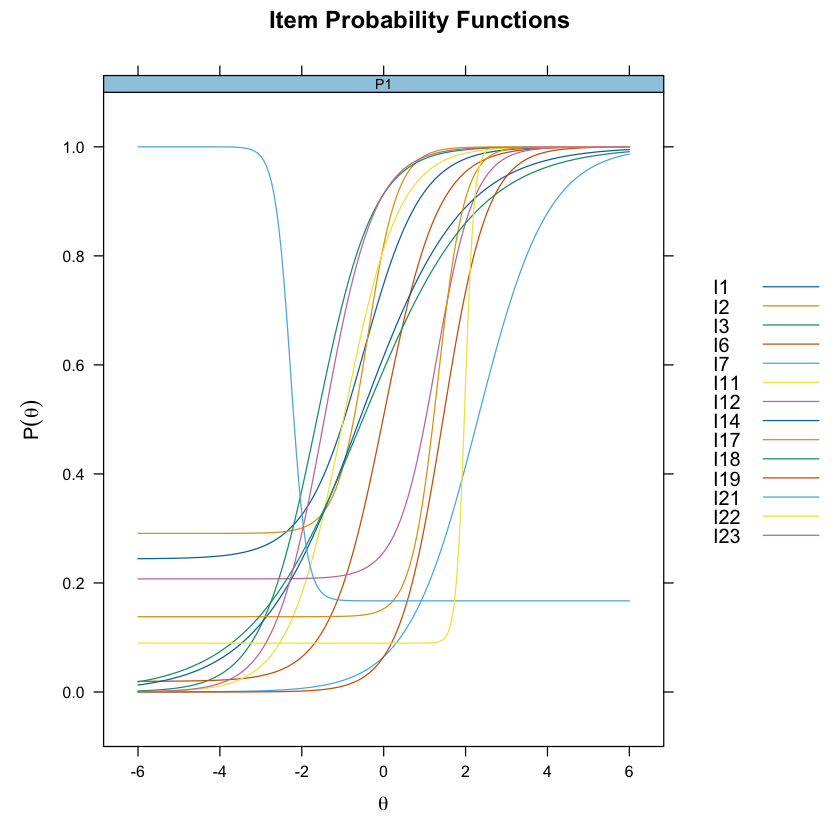

In [15]:
plot(mirt_3pl, type = "trace", facet_items = FALSE)

Un elemento chiave del modello 3PL è che l'asintoto inferiore, rappresentato dal parametro $\gamma_i$, assume un valore maggiore di zero. Questo implica che la probabilità di una risposta corretta, rappresentata da $\gamma_i$, risulta essere superiore a 0.5 per valori relativamente bassi di abilità latente. In altre parole, gli item con $\gamma_i > 0$ forniscono una probabilità di risposta corretta più alta anche per rispondenti con livelli di abilità latente relativamente bassi.

Ciò comporta che tali item risultano essere più facili per i rispondenti con abilità latente inferiore, in confronto agli item con $\gamma_i = 0$. Questa caratteristica dei modelli 3PL permette di includere il tasso di guessing nella probabilità di risposta corretta e offre una maggiore flessibilità nella modellazione del comportamento degli item rispetto al modello a due parametri (2PL), nel quale l'asintoto inferiore è pari a zero.

A negative slope indicates that, all else being equal, a person with a higher value on the latent trait is less likely to give a positive response than a person with a lower value. What a negative slope estimate means for test construction depends on context. For achievement tests, a negative slope indicates that a test item is not behaving like it should. For other psychological tests, such as personality or attitude scales, nega- tive slopes may be intended for some of the items. In this setting, test designers routinely use negatively worded items. A negatively worded version of “I like long walks on the beach”, for example, might be “I do not like long walks on the beach”. A person agreeing with the first would ideally disagree with the second3, so we could legitimately get a negative slope when the version we use is in the opposite direction to the rest of the items.

Possiamo visualizzare le stime dei parametri degli item per il 3PL utilizzando la funzione `coef()`.

In [16]:
coef(mirt_3pl, IRTpars = TRUE, simplify = TRUE)

,a,b,g,u
I1,1.4097712,-0.493210687,2.441664e-01,1
I2,2.6665125,-0.403577318,2.909004e-01,1
I3,1.4449658,-1.632526461,1.224781e-04,1
I6,1.5135421,0.008607129,1.949812e-02,1
I7,1.1634394,2.297031163,1.177019e-05,1
I11,1.4873719,-0.983622151,1.450244e-05,1
I12,2.1309230,1.275060454,2.074352e-01,1
I14,0.8047002,-0.585743232,6.144279e-05,1
I17,3.0758348,1.319978270,1.380818e-01,1
I18,0.7239776,-0.510317344,4.102312e-05,1


Effettuiamo il confronto tra i modelli 2PL e 3PL.

In [17]:
anova(mirt_2pl, mirt_3pl)

,AIC,SABIC,HQ,BIC,logLik,X2,df,p
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mirt_2pl,5575.203,5598.118,5619.462,5686.964,-2759.601,NA,NA,NA
mirt_3pl,5564.419,5598.792,5630.808,5732.061,-2740.210,38.78358,14,0.0003938891


Il modello 2PL deriva dal modello 3PL impostando un tipo specifico di parametro, ovvero il parametro di guessing, a un valore di 0. Il parametro di guessing nel modello 3PL rappresenta la probabilità che un candidato indovini correttamente un item, anche se non possiede la competenza richiesta per rispondere. Poiché il parametro di guessing può assumere valori tra 0 e 1, ciò significa che il modello ristretto nella nostra analisi, che è il modello 2PL, deriva dal modello più generale impostando un parametro a un valore ai limiti del suo spazio parametrico. In questo scenario, il classico test del rapporto di verosimiglianza può portare a risultati inaccurati. 

Pertanto, per interpretare il confronto tra i due modelli utilizziamo solo gli indici di informazione per confrontare il modello 2PL e il modello 3PL. Mentre l'AIC indica una preferenza per il modello 3PL (forse a causa del guessing presente in alcuni item), il BIC mostra una lieve preferenza per il modello 2PL più semplice, poiché penalizza maggiormente l'uso di un maggior numero di parametri nel modello.

### Bontà dell'Adattamento

Le precedenti comparazioni mostrano che il 3PL fornisce una rappresentazione migliore dei dati rispetto ai modelli Rasch o 2PL. Tuttavia, ciò non ci dice se la rappresentazione fornita dal modello 3PL sia ragionevole, ma semplicemente che è la più ragionevole tra i modelli che abbiamo confrontato. Possiamo ulteriormente testare l'adattamento di questo modello utilizzando la statistica M2, fornita dalla funzione `M2()` in mirt. Le prime tre colonne dell'output forniscono la statistica del test, i gradi di libertà e il valore p per la statistica M2. In questo caso, il valore p testa l'ipotesi nulla secondo cui le somme osservate per righe e colonne sono coerenti con il modello 3PL. In questo caso, il valore p è superiore al 5%, il che significa che il test non fornisce evidenza che il 3PL non possa rappresentare i dati osservati.

In [18]:
M2(mirt_3pl)

,M2,df,p,RMSEA,RMSEA_5,RMSEA_95,SRMSR,TLI,CFI
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stats,76.06463,63,0.1249838,0.02279774,0,0.03943958,0.04533455,0.975068,0.9827394


Oltre alla statistica M2, la funzione `M2()` stampa anche l'errore quadratico medio di approssimazione (RMSEA, insieme a un intervallo di confidenza del 90%) e il residuo quadratico medio standardizzato (SRMR), così come altri due indici di adattamento dalla statistica multivariata basati sulla statistica del test χ2. La funzione `M2()` calcola ciascuna di queste statistiche, sostituendo χ2 con il suo corrispondente a informazione limitata, M2, come spiegato nella Sezione 4.3.1 e Sezione 4.3.2.

La statistica più comunemente riportata tra queste è il RMSEA. Un modello è considerato di fornire una buona rappresentazione dei dati del test quando il limite superiore dell'intervallo di confidenza è inferiore a 0.05. In questo caso, il limite superiore è circa 0.039, suggerendo che il modello fornisce una buona rappresentazione dei dati.

È anche possibile ottenere un numero di altre statistiche di adattamento degli item tramite l'argomento `fit_stats` della funzione `itemfit()`: 

In [19]:
set.seed(1234)
itemfit(mirt_3pl, fit_stats = "PV_Q1")

item,PV_Q1,df.PV_Q1,RMSEA.PV_Q1,p.PV_Q1
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
I1,8.206189,7,0.02078128,0.31476412
I2,13.072024,7,0.04662634,0.07037285
I3,9.077944,7,0.02727605,0.24710836
I6,8.956994,7,0.02647032,0.25575849
I7,7.995062,7,0.01887512,0.33302949
I11,16.205815,7,0.05741107,0.02330110
I12,8.924171,7,0.02624740,0.25814623
I14,9.732213,7,0.03127676,0.20426338
I17,13.384634,7,0.04781152,0.06327324


In questo modo viene calcolata la statistica PV_Q1, una statistica avanzata che fornisce una misura accurata di quanto bene un item specifico si adatta a un modello IRT, tenendo conto dell'incertezza nelle stime dei parametri delle persone e offrendo l'opzione di un calcolo più accurato attraverso il bootstrap.

Gli indici infit e outfit si ottengono nel modo seguente:

In [20]:
itemfit(mirt_3pl, fit_stats = "infit", method = "ML")

Warning message:
“The following factor score estimates failed to converge successfully:
    127,128,169,180,189,233,263,298”


item,outfit,z.outfit,infit,z.infit
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
I1,1.0053224,0.08416827,0.9828264,-0.2734579
I2,0.8650919,-0.36666653,0.8733259,-2.0161598
I3,0.8763686,-0.40387987,0.9089194,-0.9403723
I6,0.9807241,-0.14508359,0.9155032,-1.5032687
I7,0.7829731,-0.79735536,0.8957264,-0.8992810
I11,1.4621993,2.38315999,0.8855767,-1.5671665
I12,0.9450892,-0.92931105,0.9415297,-1.1574013
I14,0.9674548,-0.56489989,1.0089689,0.2225748
I17,0.7836005,-2.45664322,0.8073054,-2.7086428


## Invarianza di Gruppo dei Parametri degli Item nella IRT

Una caratteristica rilevante della teoria della IRT è l'invarianza dei parametri degli item rispetto al livello di abilità degli esaminandi che rispondono agli item. Ciò significa che i parametri degli item sono ciò che si definisce "invarianti di gruppo". Questo aspetto della teoria può essere spiegato come segue. 

Immaginiamo due gruppi di esaminandi, entrambi estratti dalla stessa popolazione. Il primo gruppo presenta punteggi di abilità variabili da -3 a -1, con una media di -2, mentre il secondo gruppo ha punteggi che vanno da +1 a +3, con una media di +2. Si calcola la proporzione osservata di risposte corrette a un determinato item, per ogni livello di abilità, in entrambi i gruppi. Utilizzando la procedura di stima a massima verosimiglianza, si adatta una curva caratteristica dell'item ai dati, ottenendo stime dei parametri dell'item, ad esempio, b = 0.39 e a = 1.27. La curva caratteristica dell'item definita da queste stime viene poi tracciata per l'intervallo di abilità del primo gruppo.

In [21]:
groupinv <- function(mdl, t1l, t1u, t2l, t2u) {
    if (missing(t1l)) t1l <- -3
    if (missing(t1u)) t1u <- -1
    if (missing(t2l)) t2l <- 1
    if (missing(t2u)) t2u <- 3
    theta <- seq(-3, 3, .1875)
    f <- rep(21, length(theta))
    wb <- round(runif(1, -3, 3), 2)
    wa <- round(runif(1, 0.2, 2.8), 2)
    wc <- round(runif(1, 0, .35), 2)
    if (mdl == 1 | mdl == 2) {
        wc <- 0
    }
    if (mdl == 1) {
        wa <- 1
    }
    for (g in 1:length(theta)) {
        P <- wc + (1 - wc) / (1 + exp(-wa * (theta - wb)))
    }
    p <- rbinom(length(theta), f, P) / f
    lowerg1 <- 0
    for (g in 1:length(theta)) {
        if (theta[g] <= t1l) {
            lowerg1 <- lowerg1 + 1
        }
    }
    upperg1 <- 0
    for (g in 1:length(theta)) {
        if (theta[g] <= t1u) {
            upperg1 <- upperg1 + 1
        }
    }
    theta1 <- theta[lowerg1:upperg1]
    p1 <- p[lowerg1:upperg1]
    lowerg2 <- 0
    for (g in 1:length(theta)) {
        if (theta[g] <= t2l) {
            lowerg2 <- lowerg2 + 1
        }
    }
    upperg2 <- 0
    for (g in 1:length(theta)) {
        if (theta[g] <= t2u) {
            upperg2 <- upperg2 + 1
        }
    }
    theta2 <- theta[lowerg2:upperg2]
    p2 <- p[lowerg2:upperg2]
    theta12 <- c(theta1, theta2)
    p12 <- c(p1, p2)
    par(lab = c(7, 5, 3))
    plot(theta12, p12,
        xlim = c(-3, 3), ylim = c(0, 1),
        xlab = "Ability", ylab = "Probability of Correct Response"
    )
    if (mdl == 1) {
        maintext <- paste("Pooled Groups", "\n", "b=", wb)
    }
    if (mdl == 2) {
        maintext <- paste("Pooled Groups", "\n", "a=", wa, "b=", wb)
    }
    if (mdl == 3) {
        maintext <- paste(
            "Pooled Groups", "\n",
            "a=", wa, "b=", wb, "c=", wc
        )
    }
    par(new = "T")
    plot(theta, P,
        xlim = c(-3, 3), ylim = c(0, 1), type = "l",
        xlab = "", ylab = "", main = maintext
    )
}

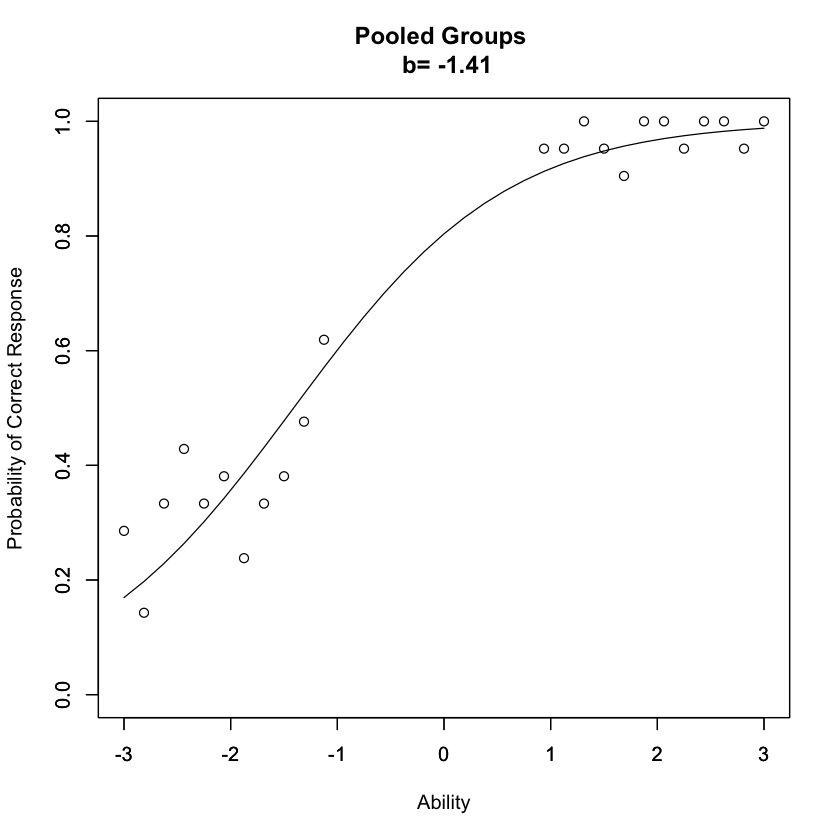

In [22]:
set.seed(1)
groupinv(1, -3, -1, 1, 3)

Il punto fondamentale è che gli stessi valori dei parametri a e b si otterrebbero applicando il modello IRT esclusivamente ai dati del primo o del secondo gruppo. Di conseguenza, i parametri dell'item sono invarianti di gruppo. Questa invarianza è una caratteristica potente della teoria della risposta all'item, indicando che i valori dei parametri dell'item sono una proprietà dell'item stesso, non del gruppo che ha risposto all'item. Questo si contrappone alla teoria classica dei test, dove la difficoltà di un item è determinata dalla proporzione complessiva di risposte corrette da parte di un gruppo di esaminandi.

Sebbene i parametri degli item - definiti come attributi intrinseci degli item indipendentemente dalle popolazioni di esaminandi - siano teoricamente invarianti tra gruppi diversi estratti dalla medesima popolazione, le stime ottenute di tali parametri attraverso procedure di massima verosimiglianza possono differire a causa della variabilità campionaria. 

In termini statistici, la stima dei parametri degli item per un dato campione è uno stimatore dei parametri reali della popolazione, ma è soggetta a errore campionario. L'errore campionario è direttamente proporzionale alla dimensione del campione e alla varianza dei dati all'interno del campione. Pertanto, benché i valori reali dei parametri degli item siano costanti tra i gruppi estratti dalla stessa popolazione, le stime campionarie di questi parametri mostreranno una distribuzione attorno al vero valore popolazionale, con una variabilità che riflette l'errore campionario. 

Inoltre, è fondamentale che l'item venga utilizzato per misurare lo stesso tratto latente in entrambi i gruppi. I parametri di un item non mantengono l'invarianza di gruppo se utilizzati fuori contesto, ovvero per misurare un tratto latente diverso, con esaminandi da una popolazione non adeguata, o se i due gruppi provengono da popolazioni diverse.

L'invarianza di gruppo dei parametri degli item illustra anche una caratteristica fondamentale della curva caratteristica dell'item. Come affermato nei capitoli precedenti, questa curva rappresenta la relazione tra la probabilità di risposta corretta all'item e la scala di abilità. Il principio di invarianza riflette questo, poiché i parametri dell'item sono indipendenti dalla distribuzione degli esaminandi sulla scala di abilità. Da un punto di vista pratico, ciò significa che i parametri dell'intera curva caratteristica dell'item possono essere stimati da qualsiasi segmento della curva. 

## La Curva Caratteristica del Test nella IRT

La Curva Caratteristica del Test (CCT) è un concetto fondamentale nella IRT che rappresenta la relazione tra il punteggio vero medio previsto (TS, True Score) di un campione di rispondenti e i vari livelli di abilità latente ($\theta$) nel campione.

#### Definizione della CCT

Per un campione di rispondenti, la CCT è definita come la somma delle probabilità medie di risposta corretta a ciascun item del test, a vari livelli di abilità. Matematicamente, è espressa come:

$$ TS(\theta) = \sum_{j=1}^{J} P_j(\theta), $$

dove:
- $ TS(\theta) $ è il punteggio vero medio per i rispondenti con un livello di abilità $\theta$,
- $ J $ è il numero totale di item nel test,
- $ P_j(\theta) $ è la probabilità media di risposta corretta all'item $ j $ per un livello di abilità $\theta$, che dipende dal modello specifico di curva caratteristica dell'item utilizzato.

#### Esempio in R

Per illustrare la CCT, consideriamo un test di quattro item. Calcoliamo la probabilità media di risposta corretta per ciascun item a vari livelli di abilità utilizzando il modello a due parametri. I parametri di discriminazione ($a_j$) e difficoltà ($b_j$) per questi item sono:

- Item 1: $a_1 = 0.5$, $b_1 = -1.0$
- Item 2: $a_2 = 1.2$, $b_2 = 0.75$
- Item 3: $a_3 = 0.8$, $b_3 = 0.0$
- Item 4: $a_4 = 1.0$, $b_4 = 0.5$

La formula per la probabilità media di risposta corretta è:

$$ P_j(\theta) = \frac{1}{1 + \exp[-a_j(\theta - b_j)]}. $$

Utilizzando `R`, calcoliamo le probabilità medie per ogni item a vari livelli di abilità e poi sommiamo queste probabilità per ottenere il punteggio vero medio.

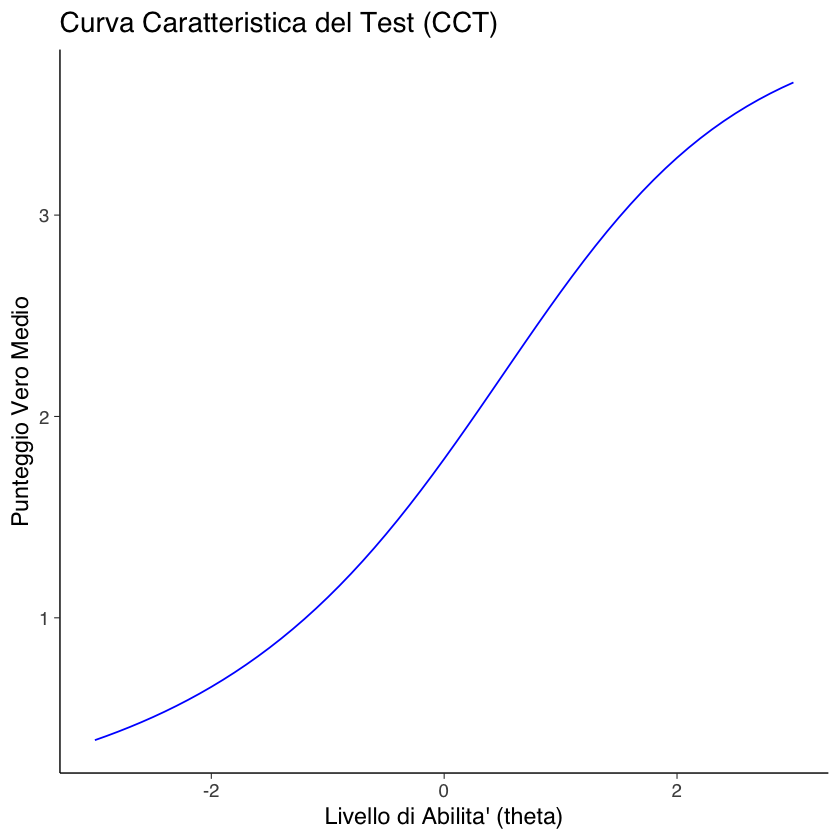

In [23]:
# Definizione dei parametri per ciascun item
a <- c(0.5, 1.2, 0.8, 1.0) # Parametri di discriminazione
b <- c(-1.0, 0.75, 0.0, 0.5) # Parametri di difficoltà

# Funzione per calcolare la probabilità media di risposta corretta
prob_correct <- function(theta, a, b) {
    1 / (1 + exp(-a * (theta - b)))
}

# Vettore di livelli di abilità (theta) da esplorare
theta_values <- seq(-3, 3, by = 0.1)

# Calcolo dei punteggi veri medi per ogni livello di abilità
true_scores <- sapply(theta_values, function(theta) {
    sum(prob_correct(theta, a, b))
})

# Creazione di un data frame per il plotting
df <- data.frame(Theta = theta_values, TrueScore = true_scores)

# Creazione del grafico della CCT
ggplot(df, aes(x = Theta, y = TrueScore)) +
    geom_line(color = "blue") +
    labs(
        title = "Curva Caratteristica del Test (CCT)",
        x = "Livello di Abilita' (theta)",
        y = "Punteggio Vero Medio"
    ) 

La CCT risultante mostra come il punteggio vero medio varia al variare del livello di abilità in un campione di rispondenti. Essa fornisce informazioni preziose sull'efficacia e sulla difficoltà del test, rivelando come il test nel suo complesso discrimina tra individui a diversi livelli di abilità. Questo rende la CCT uno strumento cruciale nella valutazione e nell'interpretazione dei risultati dei test basati sulla IRT.

### Caratterizzazione di un Test Secondo la IRT

Nella pratica attuale, molti test sono progettati secondo i principi della teoria classica dei test, ma analizzati con metodi della IRT. Per ottimizzare l'uso dell'IRT, è essenziale che la progettazione, costruzione, analisi e interpretazione dei test avvengano interamente all'interno del suo quadro teorico. Questo richiede un'armonizzazione tra la creazione del test e le procedure analitiche dell'IRT, oltrepassando il tradizionale approccio basato sulla teoria classica dei test.

#### Processo di Precalibrazione degli Item

1. **Definizione del Tratto Latente**: È cruciale identificare con precisione il tratto latente (come la competenza matematica) che i test intendono misurare.

2. **Creazione e Selezione degli Item**: Gli item vengono sviluppati per misurare il tratto latente e selezionati per l'inclusione in un pool di item. La selezione si basa sia sul contenuto che sulle caratteristiche tecniche degli item.

3. **Test Pilota e Analisi dei Dati**: Gli item vengono somministrati a un campione pilota e i dati raccolti vengono analizzati per determinare i parametri degli item, come difficoltà e discriminazione.

4. **Calibrazione degli Item**: Utilizzando un modello di IRT, gli item vengono calibrati in base ai dati raccolti, con la stima dei parametri di difficoltà e discriminazione.

5. **Stabilimento della Scala di Abilità**: Qui si entra nel cuore della precalibrazione: i parametri degli item vengono espressi in termini di una metrica di scala di abilità stabilita e conosciuta. Questo passaggio permette di avere un riferimento comune per la selezione degli item nei test futuri. In pratica, ciò significa che gli item sono valutati e classificati secondo una scala uniforme, facilitando la selezione degli item più adatti per specifici obiettivi di test.

6. **Costruzione del Test da un Item Pool Precalibrato**: Gli item selezionati dall'item pool precalibrato permettono di assemblare un test in cui le caratteristiche tecniche (come la TCC e la TIF) possono essere predette prima della somministrazione effettiva del test.

#### Vantaggi della Precalibrazione
- **Efficienza**: Risparmio di tempo e risorse, riducendo la necessità di pilotare ogni nuova versione del test.
- **Precisione**: Capacità di scegliere gli item in base ai requisiti specifici del test.
- **Flessibilità**: Facilità nella creazione di versioni multiple del test o test adattivi.

#### Obiettivi Specifici dei Test
- **Test di Screening**: Progettati per distinguere tra esaminandi sotto e sopra un livello di abilità specifico. La TCC e la TIF sono ottimizzate per questo scopo.
- **Test a Gamma Ampia**: Mirati a misurare l'abilità su un'ampia gamma della scala di abilità, con la TCC che riflette questa ampiezza.
- **Test con Picco**: Focalizzati su una specifica regione della scala di abilità, misurando l'abilità efficacemente in quella regione e meno accuratamente al di fuori di essa.

#### Sperimentazione e Personalizzazione
I costruttori di test possono sperimentare con diverse combinazioni di obiettivi di test, modelli di curva caratteristica degli item e numero di item per conseguire TCC e TIF ottimali. L'obiettivo è la creazione di test che misurino in modo preciso e coerente il tratto latente di interesse, adattandosi agli scopi specifici per cui il test è stato progettato.

In conclusione, la costruzione di test nell'ambito della IRT richiede un approccio integrato, che consideri la fase di precalibrazione degli item e la fase di selezione e combinazione di questi per creare test che soddisfino obiettivi specifici, garantendo così misurazioni accurate e utili.

In [24]:
mathdata <- rio::import("../data/mathdata.txt")
mathdata |> head()

,V1,V2,V3,V4,V5
,<int>,<int>,<int>,<int>,<int>
1,1,1,0,0,0
2,1,1,1,0,0
3,1,0,0,0,0
4,1,1,1,0,0
5,1,0,1,1,0
6,1,1,1,0,0


In [25]:
dim(mathdata)

[1] 19601     5

In [26]:
rasch <- mirt(mathdata, 1, "Rasch", SE = TRUE, SE.type = "Fisher")
TwoPL <- mirt(mathdata, 1, "2PL", SE = TRUE, SE.type = "Fisher")

Iteration: 38, Log-Lik: -55387.029, Max-Change: 0.00009

Calculating information matrix...


Iteration: 20, Log-Lik: -55198.496, Max-Change: 0.00007

Calculating information matrix...


In [27]:
M2(rasch, CI = 0.95) # Maydeu-Olivares & Joe statistic

,M2,df,p,RMSEA,RMSEA_2.5,RMSEA_97.5,SRMSR,TLI,CFI
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stats,428.241,9,0,0.04875089,0.04411739,0.05349489,0.04211215,0.9597483,0.9637735


In [28]:
M2(TwoPL, CI = 0.95) # Maydeu-Olivares & Joe statistic

,M2,df,p,RMSEA,RMSEA_2.5,RMSEA_97.5,SRMSR,TLI,CFI
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stats,57.02138,5,5.005907e-11,0.02303976,0.01685003,0.02961753,0.01336253,0.9910097,0.9955048


In [29]:
print(itemfit(TwoPL, fit_stats = "S_X2"), digits = 5)

  item     S_X2 df.S_X2 RMSEA.S_X2  p.S_X2
1   V1 80.50442       2    0.04475 0.00000
2   V2 19.40097       2    0.02107 0.00006
3   V3 13.66416       2    0.01725 0.00108
4   V4 65.60787       2    0.04028 0.00000
5   V5 34.67477       2    0.02887 0.00000


In [30]:
itemfit(TwoPL, S_X2.tables = T, empirical.table = 1)

item,S_X2,df.S_X2,RMSEA.S_X2,p.S_X2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
V1,80.50442,2,0.04475113,3.301323e-18
V2,19.40097,2,0.02106899,6.125392e-05
V3,13.66416,2,0.01724979,1.078610e-03
V4,65.60787,2,0.04028213,5.668037e-15
V5,34.67477,2,0.02887110,2.954394e-08


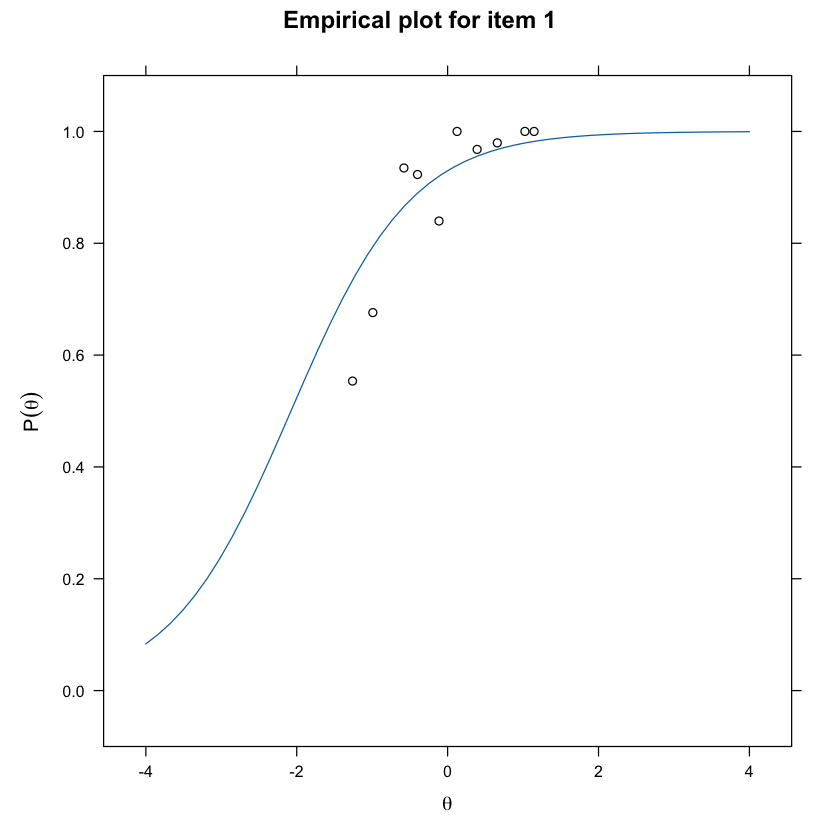

In [31]:
itemfit(TwoPL, group.bins = 10, empirical.plot = 1, empirical.CI = 0)

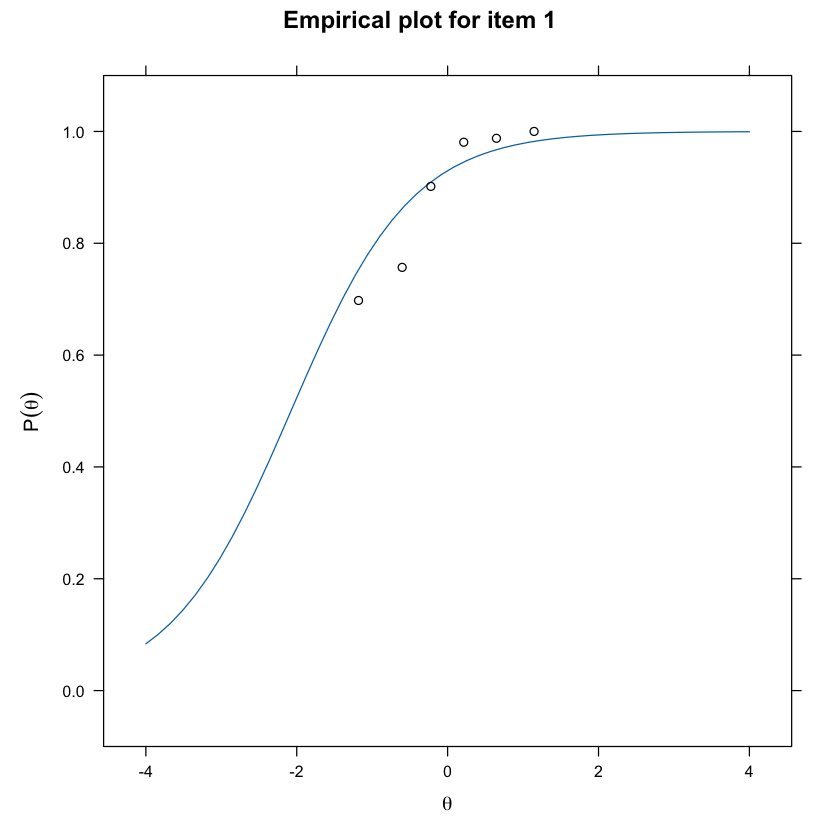

In [32]:
itemfit(TwoPL,
    group.bins = 6, empirical.plot = 1,
    empirical.CI = 0
)

## Considerazioni Conclusive

Il pacchetto `mirt` (Chalmers, 2021) offre funzionalità per l'adattamento di una varietà di modelli IRT, inclusi i modelli Rasch, 2PL e 3PL, nonché diversi modelli per risposte politomiche utilizzando la massima verosimiglianza marginale. In questo capitolo, abbiamo esplorato come sia possibile confrontare i modelli 1PL, 2PL e 3PL, che sono stati adattati ai dati usando `mirt`, attraverso il test del rapporto di verosimiglianza e gli indici di informazione.

## Session Info

In [33]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: aarch64-apple-darwin20 (64-bit)
Running under: macOS Sonoma 14.3.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] C/UTF-8/C/C/C/C

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] latex2exp_0.9.6   psychotools_0.7-3 ggmirt_0.1.0      TAM_4.2-21       
 [5] CDM_8.2-6         mvtnorm_1.2-4     mirt_1.41         lattice_0.22-5   
 [9] eRm_1.0-4         ggokabeito_0.1.0  viridis_0.6.5     viridisLite_0.4.2
[13] ggpubr_0.6.0      ggExtra_0.10.1    bayesplot_1.11.1  gridExtra_2.3    
[17] patchwork_1.2.0   semTools_0.5-6    semPlot_1.1.6     lavaan_0.6-17    
[21] psych_2.4.1       scales_1.3.0      markdown_1.